In [2]:
import pandas as pd
import numpy as np
import os
from math import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor


/home/guts/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the data

path = "/home/guts/Documents/accel_data/merged_data.csv"
df = pd.read_csv(path)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


# Data Preprocessing
df = df.set_index('Timestamp')
df = df.resample('1S').mean()
df = df.dropna()
df

#linear_bias = np.sqrt(df['Linear x']**2 + df['Linear y']**2 + df['Linear z']**2)
#angular_bias = np.sqrt(df['Angular x']**2 + df['Angular y']**2 + df['Angular z']**2)
#filtered_bias = np.sqrt(df['Filtered x']**2 + df['Filtered y']**2 + df['Filtered z']**2)
#
#caliberated_linear_x = df['Linear x'] - linear_bias
#caliberated_linear_y = df['Linear y'] - linear_bias
#caliberated_linear_z = df['Linear z'] - linear_bias
#caliberated_angular_x = df['Angular x'] - angular_bias
#caliberated_angular_y = df['Angular y'] - angular_bias
#caliberated_angular_z = df['Angular z'] - angular_bias
#caliberated_filtered_x = df['Filtered x'] - filtered_bias
#caliberated_filtered_y = df['Filtered y'] - filtered_bias
#caliberated_filtered_z = df['Filtered z'] - filtered_bias
#
#caliberated_df = pd.DataFrame({'Caliberated Linear x': caliberated_linear_x, 'Caliberated Linear y': caliberated_linear_y, 'Caliberated Linear z': caliberated_linear_z, 'Caliberated Angular x': caliberated_angular_x, 'Caliberated Angular y': caliberated_angular_y, 'Caliberated Angular z': caliberated_angular_z, 'Caliberated Filtered x': caliberated_filtered_x, 'Caliberated Filtered y': caliberated_filtered_y, 'Caliberated Filtered z': caliberated_filtered_z})
#caliberated_df


,Linear x,Linear y,Linear z,Filtered x,Filtered y,Filtered z,Angular x,Angular y,Angular z
Timestamp,,,,,,,,,
2024-08-23 14:24:45,-0.08,0.01,0.14,-0.149835,0.008999,-10.120889,0.006762,-0.004553,0.004431
2024-08-23 14:24:53,-0.14,-0.01,0.15,-0.305458,-0.085572,-10.058042,-0.004956,-0.005618,-0.003025
2024-08-23 14:25:05,-0.10,0.03,0.10,-0.296480,0.041919,-10.014946,0.002501,0.010361,0.005497
2024-08-23 14:25:09,-0.05,0.11,-0.15,-0.257574,-0.110112,-10.016742,0.005697,-0.014140,-0.004091
2024-08-23 14:25:14,-0.05,0.01,0.17,-0.142054,-0.128069,-9.561244,-0.008151,0.007165,0.004431
...,...,...,...,...,...,...,...,...,...
2024-08-28 09:32:59,0.23,-0.10,-0.38,-2.314792,-1.306016,-8.895657,-0.006021,0.003969,-0.020070
2024-08-28 09:33:04,-0.05,-0.02,-0.10,-1.636634,-0.231618,-9.140464,0.016350,-0.005618,0.011888
2024-08-28 09:33:06,-0.09,-0.03,0.04,-2.512314,-1.347316,-10.022128,-0.011347,0.002904,0.025737


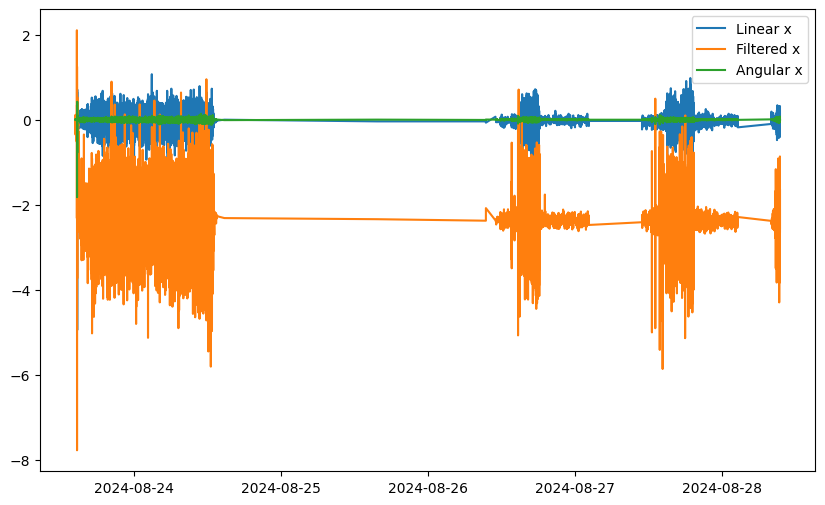

In [7]:


plt.figure(figsize=(10, 6))
plt.plot(df['Linear x'], label='Linear x')
plt.plot(df['Filtered x'], label='Filtered x')
plt.plot(df['Angular x'], label='Angular x')
plt.legend()
plt.show()


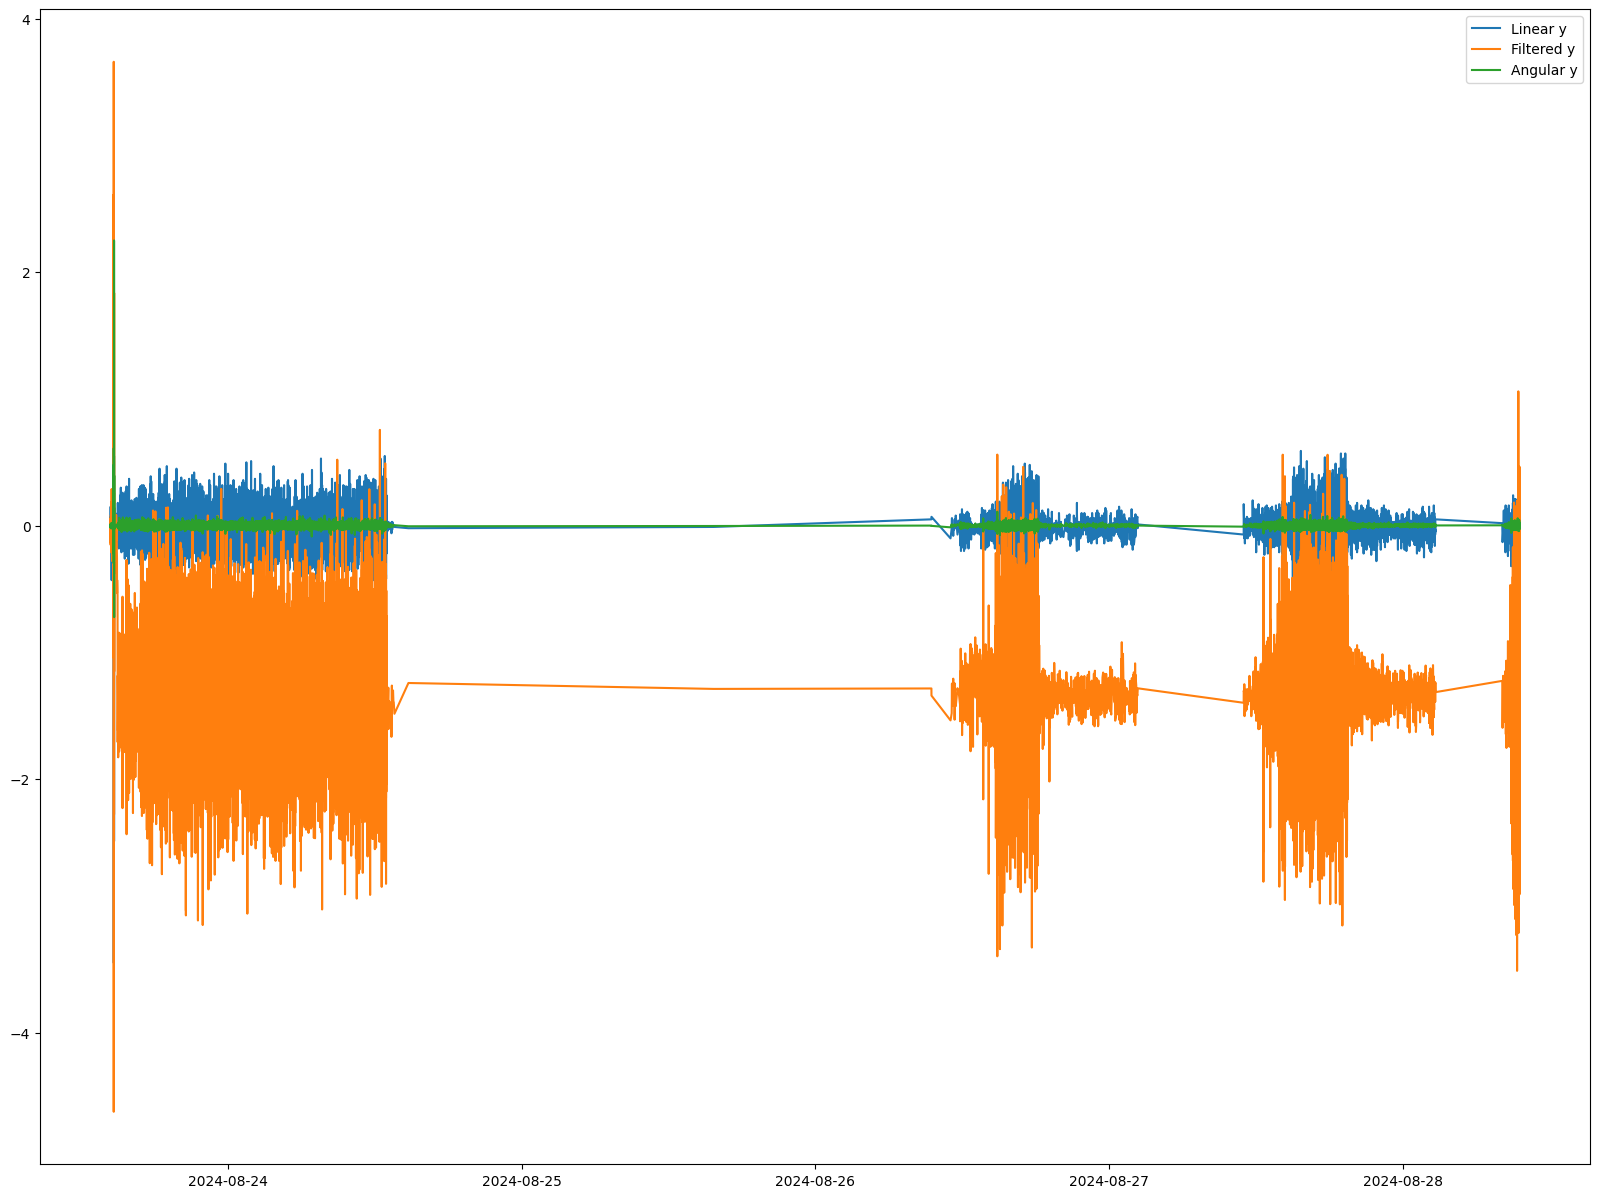

In [6]:
plt.figure(figsize=(20, 15))
plt.plot(df['Linear y'], label='Linear y')
plt.plot(df['Filtered y'], label='Filtered y')
plt.plot(df['Angular y'], label='Angular y')
plt.legend()
plt.show()


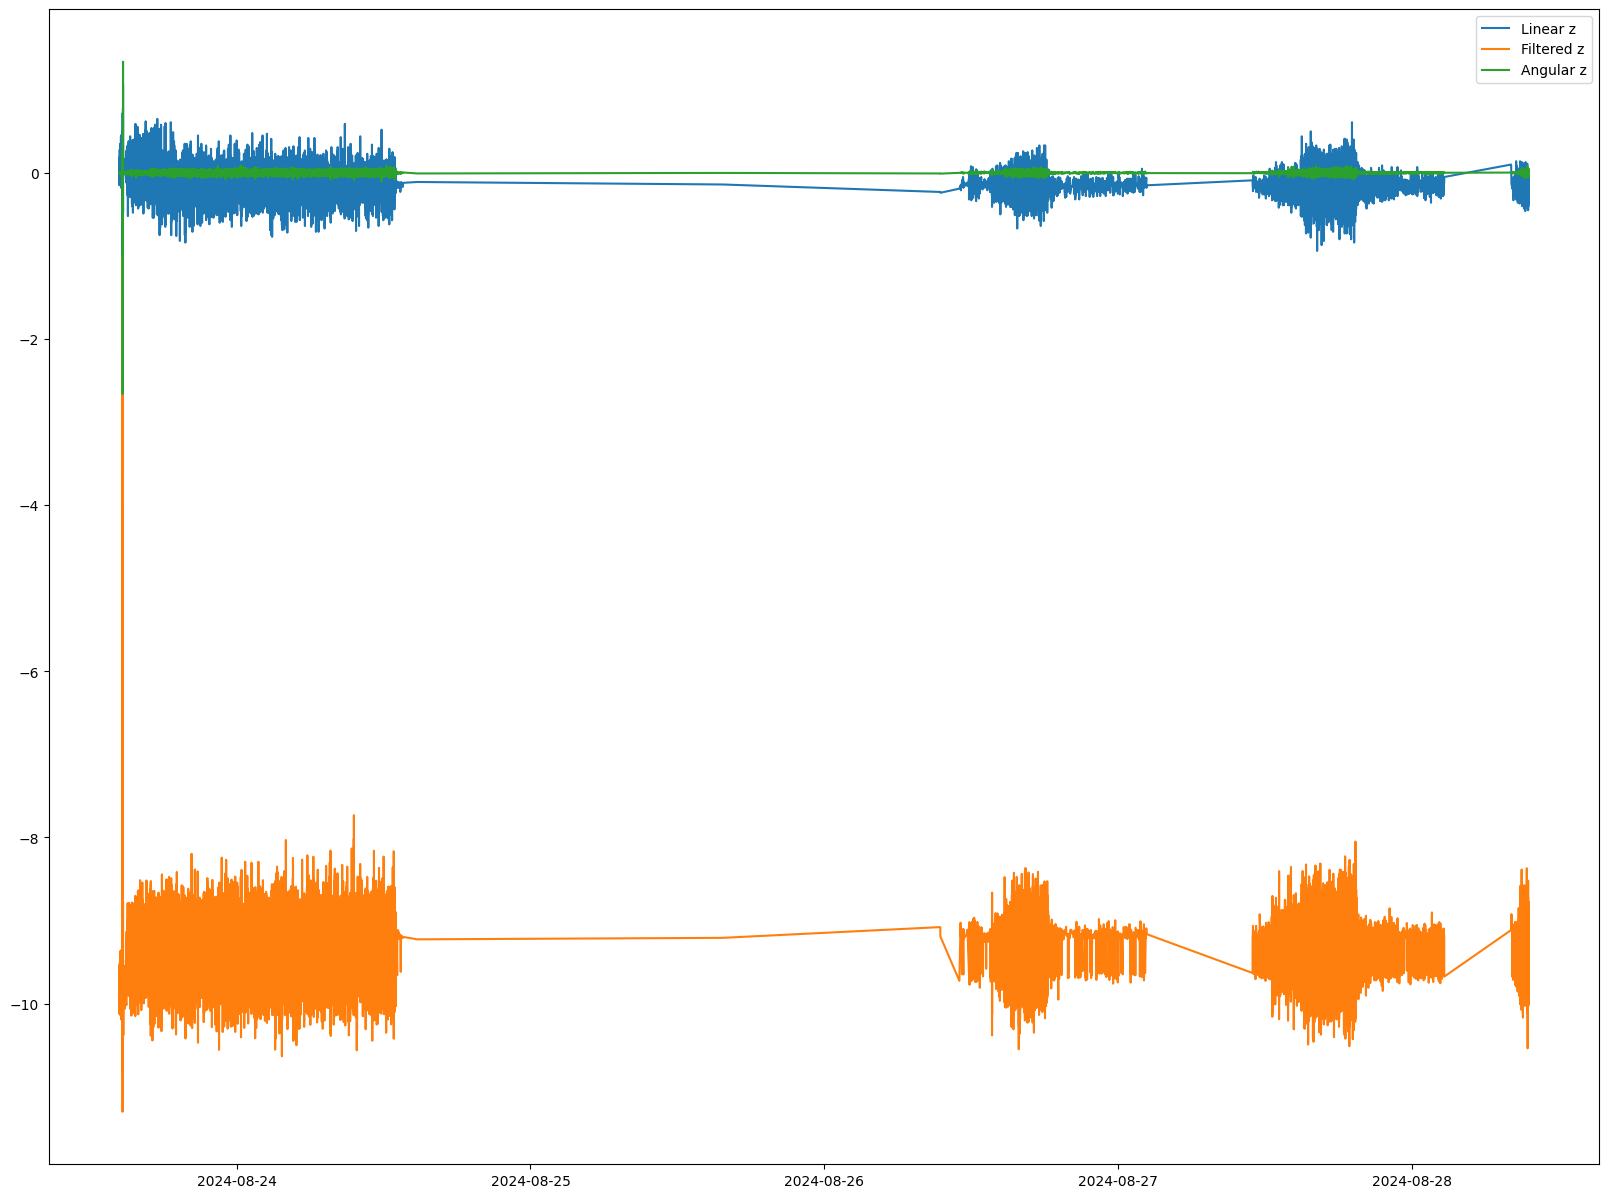

In [7]:
plt.figure(figsize=(20, 15))
plt.plot(df['Linear z'], label='Linear z')
plt.plot(df['Filtered z'], label='Filtered z')
plt.plot(df['Angular z'], label='Angular z')
plt.legend()
plt.show()

In [8]:

# Scale the data using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame()
df_scaled['Acceleration'] = df['Linear y']  
df_scaled


,Acceleration
Timestamp,
2024-08-23 14:24:45,0.01
2024-08-23 14:24:53,-0.01
2024-08-23 14:25:05,0.03
2024-08-23 14:25:09,0.11
2024-08-23 14:25:14,0.01
...,...
2024-08-28 09:32:59,-0.10
2024-08-28 09:33:04,-0.02
2024-08-28 09:33:06,-0.03


In [9]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_scaled)
df['Cluster'] = kmeans.labels_

# Count the number of data points in each cluster
cluster_counts = df['Cluster'].value_counts()
cluster_counts


Cluster
0    19383
2    18556
4     5517
1     4763
3      981
Name: count, dtype: int64

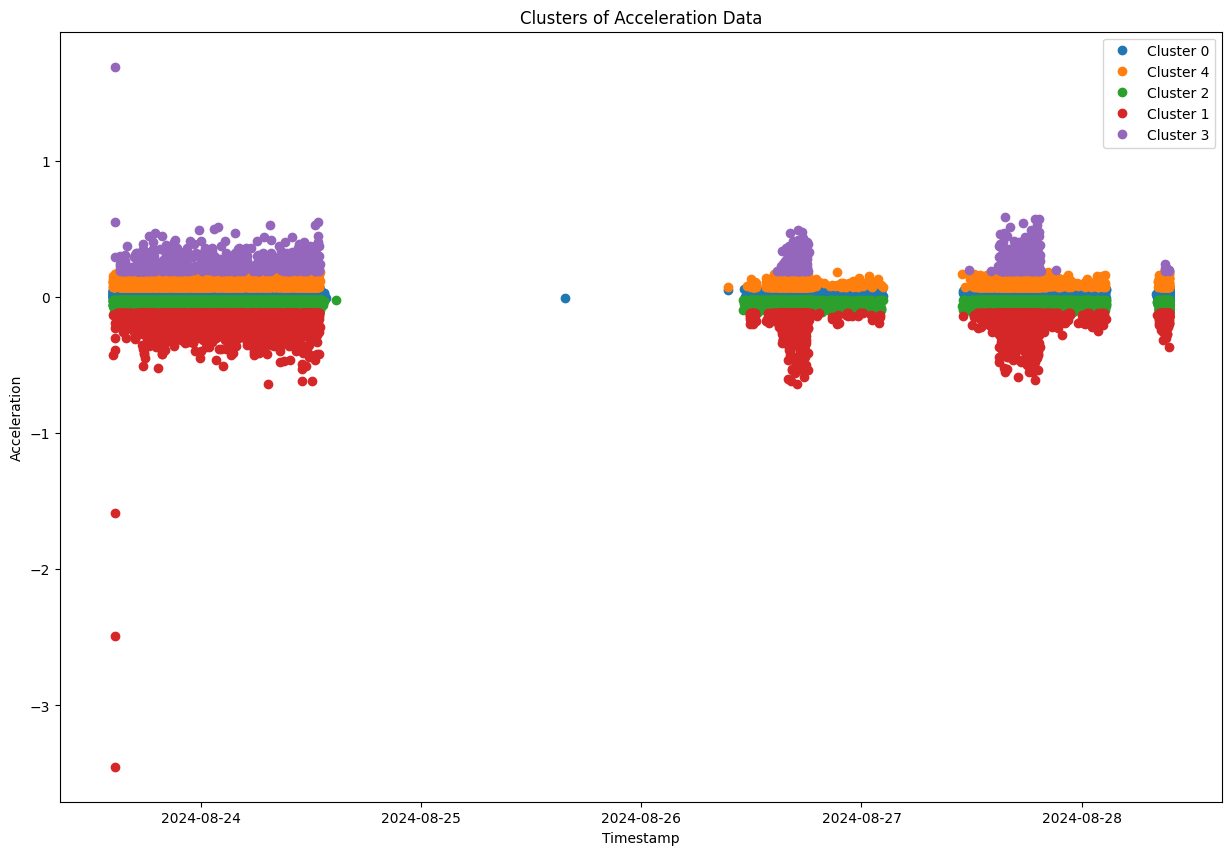

In [10]:

# Plotting the clusters
fig, ax = plt.subplots(figsize=(15, 10))
for cluster in df['Cluster'].unique():
    plt.plot(df[df['Cluster'] == cluster].index, df[df['Cluster'] == cluster]['Linear y'], marker='o', linestyle='', label=f'Cluster {cluster}')

plt.legend()
plt.title('Clusters of Acceleration Data')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.show()

In [11]:
cluster_list=df['Cluster'].value_counts()
cluster_list.index

Index([0, 2, 4, 1, 3], dtype='int32', name='Cluster')

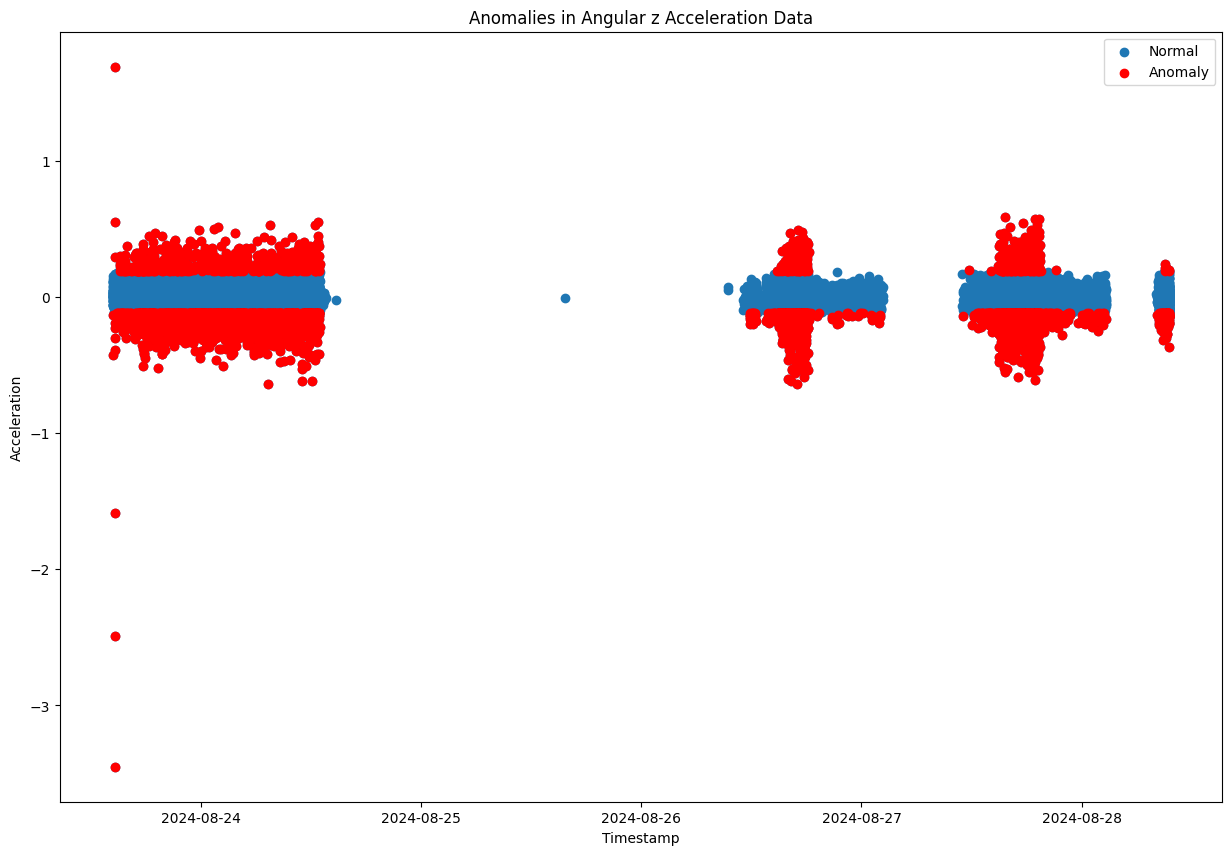

In [12]:

# Find the anomalies
anomalies = df[(df['Cluster'] == cluster_list.index[-1]) | (df['Cluster'] == cluster_list.index[-2] )]

# Plot the anomalies
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(df.index, df['Linear y'], label='Normal')
plt.scatter(anomalies.index, anomalies['Linear y'], label='Anomaly', color='r')
plt.legend()
plt.title('Anomalies in Angular z Acceleration Data')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.show()

In [13]:
# Print the number of anomalies

healthy = df[~df.index.isin(anomalies.index)]
print(f'Number of anomalies: {len(anomalies)}')
print(f'Number of healthy data points: {len(healthy)}')
print(f'Percentage of anomalies: {len(anomalies) / len(df) * 100:.2f}%')

Number of anomalies: 5744
Number of healthy data points: 43456
Percentage of anomalies: 11.67%


In [14]:
### lets see the threshold if we use normal univariate z-score cut off
threshold = df['Linear x'].mean() + 3 * df['Linear x'].std()

# Create a new DataFrame containing values above the threshold
df_outliers_univar = df[df['Linear x'] > threshold]

# Print the threshold in a pretty way
print(f"Threshold for outliers (mean + 3 * std): {threshold:.2f}")

# Display the first few rows of df_outliers_univar
print(f"Number of datapoints flagged as outliers: {df_outliers_univar.shape[0]} ")
print()

Threshold for outliers (mean + 3 * std): 0.34
Number of datapoints flagged as outliers: 426 



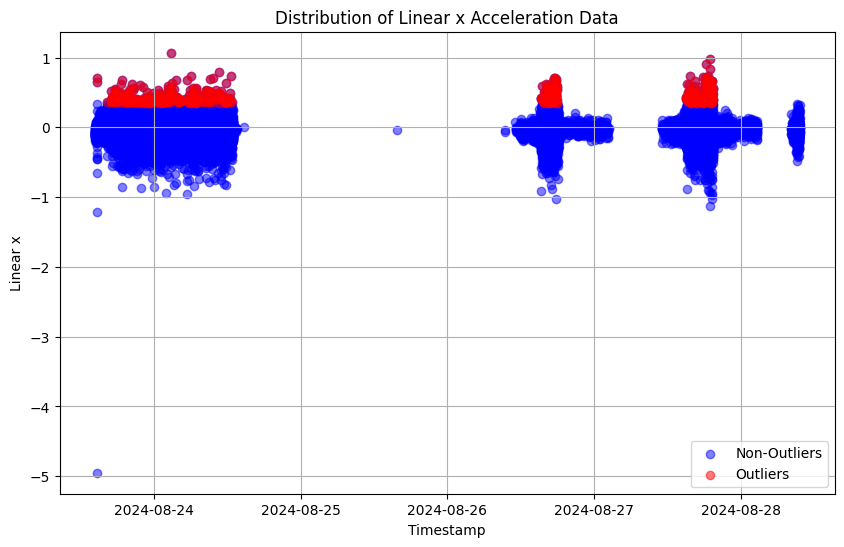

In [17]:
# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot all data points in blue
plt.scatter(df.index, df['Linear x'], marker='o', color='b', alpha=0.5, label='Non-Outliers')

# Plot data points in df_outliers_univar in red
plt.scatter(df_outliers_univar.index, df_outliers_univar['Linear x'], marker='o', color='r', alpha=0.5, label='Outliers')

# Add labels and title
plt.xlabel('Timestamp')
plt.ylabel('Linear x')
plt.title('Distribution of Linear x Acceleration Data')

# Show a legend to differentiate between outliers and non-outliers
plt.legend()

# Show the plot
plt.grid(True)
plt.show()